# Question 1 - Cross-Correlation

The cross-correlation of two functions $f(x)$ and $g(x)$ is defined as
$$(f \ast g)(y) = \int f(x)g(x + y)dx$$

Similarly to the convolution, it is straightforward to show that this can be evaluated using Fourier transforms as
$$FT(f \ast g) = FT(f)\ast\overline{FT(g)}$$
where $FT$ indicates a Fourier transform and the overbar indicates the complex conjugate.

## **a)** Proof

Imagine that we have the values of two functions $f$ and $g$ defined on a grid in $x$ with $n$ grid points. The integral defining the cross-correlation becomes a sum in this discrete case.

### **Show that there are $2n - 1$ possible values of $y$ at which $f \ast g$ can be evaluated.**

On a grid of $n$ points in $x$, $x$ can take values from $0 \rightarrow n-1$. Since $g(x - y)$ is only defined when $x - y$ is within the range of grid points for $x$, that is, when $0 \leq x - y \leq (n-1)$. This means that on one side, $y$ is bounded by the maximum value of $x$:
$$ 0 \leq x - y \\
\rightarrow 0 \leq (n - 1) - y \\
\rightarrow -(n - 1) \leq -y \\
\rightarrow (n - 1) \geq y$$

and the other side of y is bounded by the minimum value for $x$:
$$ x - y \leq (n - 1) \\
\rightarrow 0 - y \leq (n - 1) \\
\rightarrow -y \leq (n - 1) \\
\rightarrow y \geq -(n - 1)\\
$$

Therefore, the possible values for $y$ range from $-(n-1) \rightarrow (n-1)$.
$$ n - 1 - (- (n - 1)) = n - 1 - (-n + 1) = n - 1 + n - 1  = 2n - 2$$
But we must also include 0 as a possible state of y:
$$2n - 2 + 1 = 2n - 1$$
Therefore, there are $2n - 1$ possible values for $y$.

**Write a function that evaluates the sum and returns the vector containing the $2n - 1$ values of $f\ast g$.**

 In general, the value for $y$ will be determined by the value for $x$ in order to keep $x - y$ within the range of x:
$$ 0 \leq x - y\\
(0 - x) \leq -y\\
-x \leq -y\\
x \geq y\\
$$
and
$$ x - y \leq (n - 1) \\
-y \leq (n - 1 - x) \\
y \geq -(n - 1 - x) \\
y \geq (-n + 1 + x)
$$
So, in general:
$$(-n + 1 + x) \leq y \leq x$$

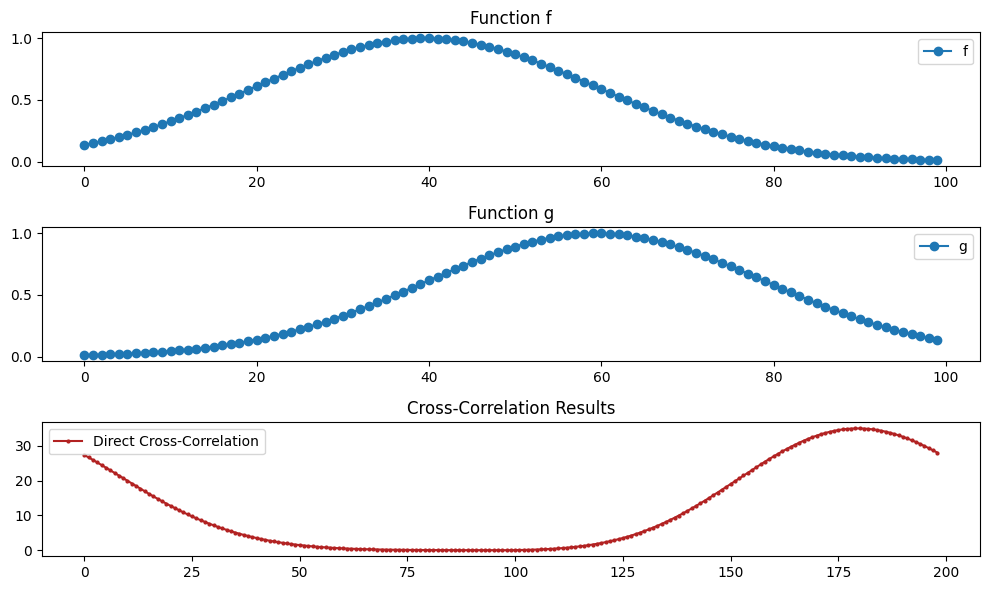

The length of f is 100, so 2n - 1 = 199
The length of the cross-correlation result is 199


In [65]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian(x, a, b, c):
    return a * np.exp(-(x - b)**2 / (2 * c**2))

def cross_correlation(f, g):
    '''
    This function computes the cross-correlation of two signals f and g.
    Inputs:
        f: a 1D numpy array
        g: a 1D numpy array
    Output:
        result: a 1D numpy array of length 2n - 1, where n is the length of f    
    '''
    # Initialize the parameters
    n = len(f)
    m = len(g)

    result = np.zeros(2 * n - 1)
    x_vals = np.arange(0, n) # x ranges from -(n-1) to n-1

    # Compute the cross-correlation
    for y in range(-(n-1), n): # y ranges from -(n-1) to n-1
        sum_val = 0
        
        for x in range(max(0, y), min(n, n + y)): # Only sum over the indices where f and g overlap
            # max(0, y): when y is negative, x should start at 0
            # min(n, n + y): when y is positive, x should end at n
            
            sum_val += f[x] * g[x - y]

        result[y + (n-1)] = sum_val
    
    # Shift the results array to account for the non-monotonic ordering of y
    result = np.roll(result, n)

    return result

# Example usage:
n = 100
m = 100

L = 5
x_f = np.linspace(0, L, n)
x_g = np.linspace(0, L, m)
f = gaussian(x_f, 1, 2, 1)  # Gaussian function centered at 2
g = gaussian(x_g, 1, 3, 1)  # Gaussian function centered at 3

result = cross_correlation(f, g)

# Plotting
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(f, 'o-', label='f')
plt.legend()
plt.title('Function f')

plt.subplot(3, 1, 2)
plt.plot(g, 'o-', label='g')
plt.legend()
plt.title('Function g')

plt.subplot(3, 1, 3)
plt.plot(result, 'o-', color = "firebrick", ms = 2, label='Direct Cross-Correlation')
plt.legend()
plt.title('Cross-Correlation Results')

plt.tight_layout()
plt.show()

print(f'The length of f is {n}, so 2n - 1 = {2*n-1}')
print('The length of the cross-correlation result is', len(result))

## **b)** Implementation with Fourier Transforms

**Implement the cross-correlation using the Fourier transform**.

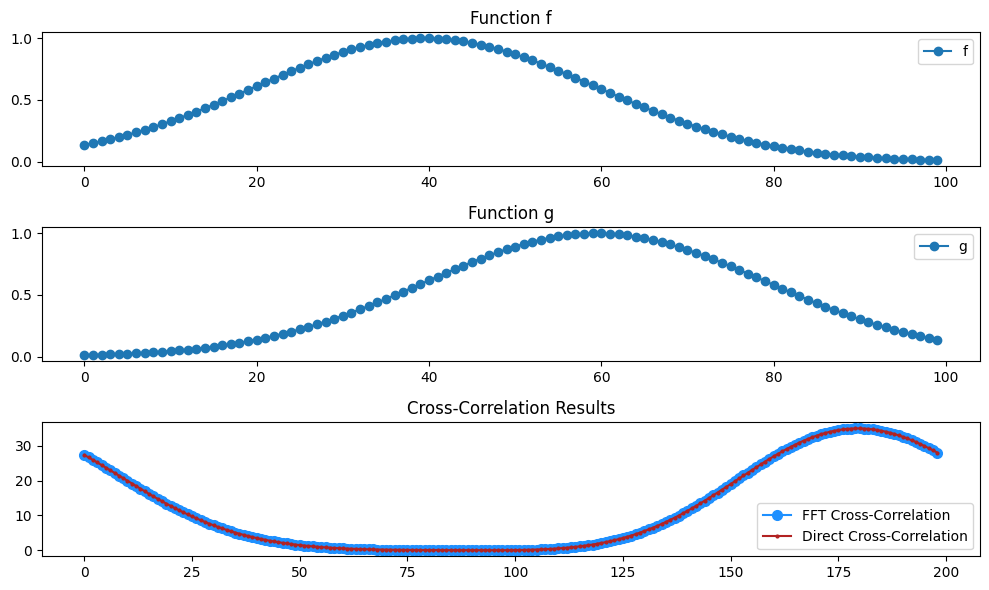

The length of f is 100, so 2n - 1 = 199
The length of the cross-correlation result is 199


In [45]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian(x, a, b, c):
    return a * np.exp(-(x - b)**2 / (2 * c**2))

def cross_correlation_fft(f, g):
    # Zero-pad the vectors to ensure 2n-1 values in the result
    n = len(f)
    m = len(g)

    padded_length = n + m - 1 # 2n - 1

    # Compute the FFT of the padded vectors
    F_f = np.fft.fft(f, n = padded_length)
    F_g = np.fft.fft(g, n = padded_length)
    conj_F_g = np.conjugate(F_g)

    # Compute the product in the frequency domain
    cross_correlation_freq = F_f * conj_F_g

    # Inverse FFT to get back to the time domain
    cross_correlation_time = np.fft.ifft(cross_correlation_freq)

    # Take the real part (imaginary part should be very close to zero)
    result = np.real(cross_correlation_time)

    return result

# Example usage:
n = 100
m = 100

L = 5
x_f = np.linspace(0, L, n)
x_g = np.linspace(0, L, m)
f = gaussian(x_f, 1, 2, 1)  # Gaussian function centered at 2
g = gaussian(x_g, 1, 3, 1)  # Gaussian function centered at 3

result_fft = cross_correlation_fft(f, g)
result_direct = cross_correlation(f, g)

# Plotting
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(f, 'o-', label='f')
plt.legend()
plt.title('Function f')

plt.subplot(3, 1, 2)
plt.plot(g, 'o-', label='g')
plt.legend()
plt.title('Function g')

plt.subplot(3, 1, 3)
plt.plot(result_fft, 'o-', color = "dodgerblue", ms = 7, label='FFT Cross-Correlation')
plt.plot(result_direct, 'o-', color = "firebrick", ms = 2, label='Direct Cross-Correlation')
plt.legend()
plt.title('Cross-Correlation Results')

plt.tight_layout()
plt.show()

print(f'The length of f is {n}, so 2n - 1 = {2*n-1}')
print('The length of the cross-correlation result is', len(result_fft))

## **c)** No Padding

**Repeat part b) without zero-padding the DFTs.**

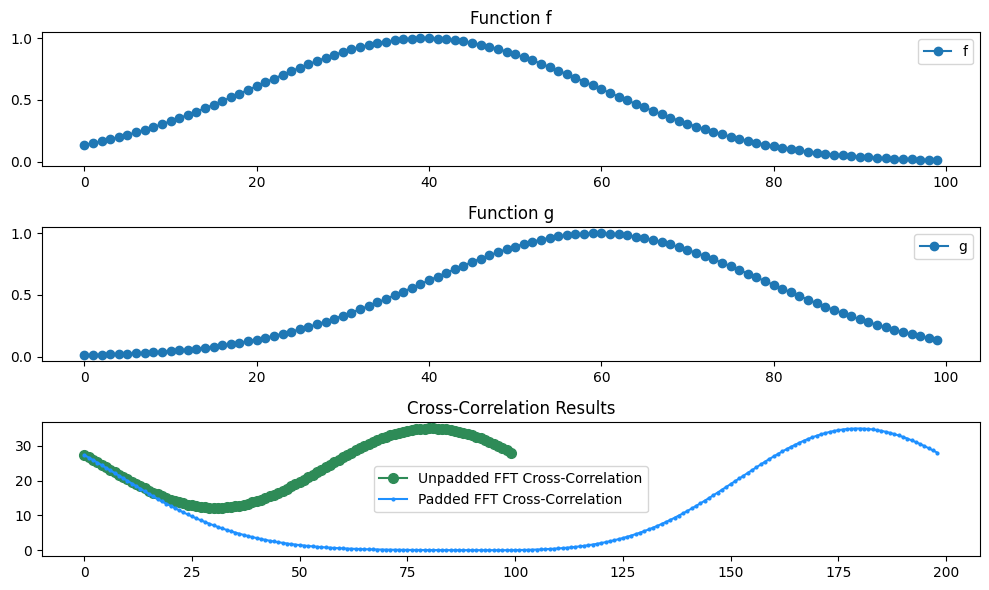

The length of f is 100, so 2n - 1 = 199
The length of the cross-correlation result is 199
The length of the circular cross-correlation result is 100


In [48]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian(x, a, b, c):
    return a * np.exp(-(x - b)**2 / (2 * c**2))

def circular_cross_correlation_fft(f, g):
    n = len(f)
    m = len(g)

    # Compute the FFT of the un-padded vectors
    F_f = np.fft.fft(f)
    F_g = np.fft.fft(g)

    # Compute the product in the frequency domain
    cross_correlation_freq = F_f * np.conj(F_g)

    # Inverse FFT to get back to the time domain
    cross_correlation_time = np.fft.ifft(cross_correlation_freq)

    # Take the real part (imaginary part should be very close to zero)
    result = np.real(cross_correlation_time)

    return result

# Example usage:
n = 100
m = 100

L = 5
x_f = np.linspace(0, L, n)
x_g = np.linspace(0, L, m)
f = gaussian(x_f, 1, 2, 1)  # Gaussian function centered at 2
g = gaussian(x_g, 1, 3, 1)  # Gaussian function centered at 3

result_fft = cross_correlation_fft(f, g)
result_circular_fft = circular_cross_correlation_fft(f, g)

# Plotting
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(f, 'o-', label='f')
plt.legend()
plt.title('Function f')

plt.subplot(3, 1, 2)
plt.plot(g, 'o-', label='g')
plt.legend()
plt.title('Function g')

plt.subplot(3, 1, 3)
plt.plot(result_circular_fft, 'o-', color = "seagreen", ms = 7, label='Unpadded FFT Cross-Correlation')
plt.plot(result_fft, 'o-', color = "dodgerblue", ms = 2, label='Padded FFT Cross-Correlation')
plt.legend()
plt.title('Cross-Correlation Results')

plt.tight_layout()
plt.show()

print(f'The length of f is {n}, so 2n - 1 = {2*n-1}')
print('The length of the cross-correlation result is', len(result_fft))
print('The length of the circular cross-correlation result is', len(result_circular_fft))

**What difference does it make?**

When you don't zero-pad the DFTs before computing the cross-correlation using FFT, the convolution can only compare the correlation of the functions without any shift. Normally, cross-correlation takes two signals and shifts them by one each time, calculating the correlation point-by-point for each shift. In the case of the two gaussians, they are identical and so for some shift value should match perfectly. However, if there is no padding, there is no room in the array for the two gaussians to shift left or right relative to each other, and so we only get the correlation for the original, unshifted positions.

**What part of the cross-correlation function is computed in this case?**

The cross-correlation that is computed when there is zero padding is the immediate correlation of f with g without any shifting. That is why there is only 100 points, as this is the range $0 \rightarrow n-1$ that I provided it, and it is doing a 1-to-1 correlation between the two functions.

# Question 2 - Diffusion with Chebyshev Polynomials

Solve the diffusion equation
$$\frac{\partial f}{\partial t} = \frac{\partial^2}{\partial x^2}$$
for $f(x)$ between $x = 0$ and $1$ with boundary conditions $f(\pm 1) = 0$. You should use a spectral method based on Chebyshev polynomials. That is, write $f(x)$ as a series of Chebyshev polynomials
$$f(x) = \sum_i a_i(t)T_i(x)$$
where $T_i(x)$ is the *i*th Chebyshev polynomial and $a_i(t)$ are the coefficients that you evolve in time.

As a test problem:
- Take the initial $f(x)$ to be the Green's Function for the diffusion equation evaluated at an initial time $t = t_0$ and evolve it forwards in time, comparing with the analytic solution. 
- Check how the error compared to the analytic solution depends on the number of modes that you include in your Chebyshev series.
- Comment on how the scaling compares with what you would expect from finite differences.


Notes:
- You can fit a Chebyshev series to your initial $f(x)$ using np.polynomial.chebyshev.chebfit
- You should use an even number of polynomials in your Chebyshev series
- Once you have the initial coefficients $a_i$, you can evolve them in time with a first order explicit Euler update
- To calculate $\frac{da_i}{dt}$, you can use np.polynomial.chebyshev.chebder to obtain coefficients of a Chebyshev series representing the second derivative $\frac{\partial^2 f}{\partial x^2}$
- To enforce the boundary conditions initially and after each timestep, you can use the last two $a_i$ values to set the sum of the even $a_i$ coefficients and the odd $a_i$ coefficients to zero.
- Set the coefficients to zero if they become too small, e.g. set $a_i = 0$ if $a_i$ drops below $10^{-10}$

original len of a is 41


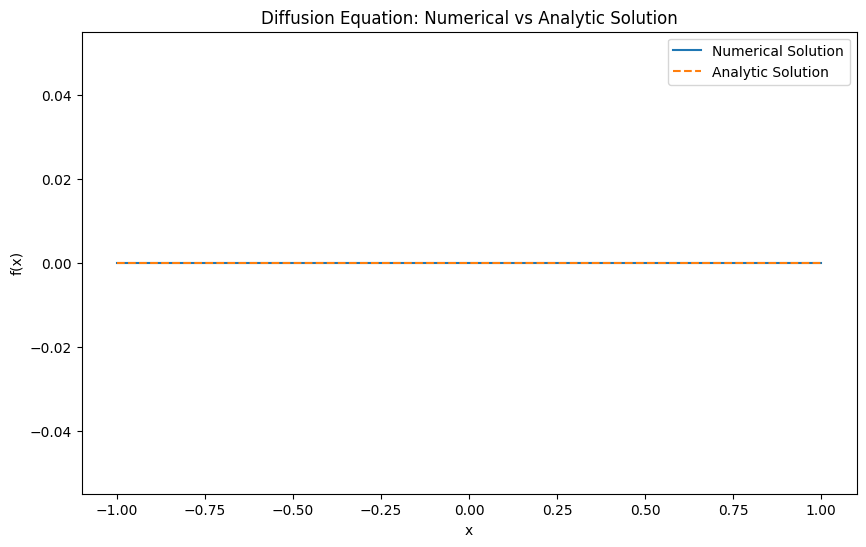

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import chebyshev

def gaussian(x, a, b, c):
    """
    Compute a Gaussian function.

    Parameters:
    - x: Input array.
    - a: Amplitude of the Gaussian.
    - b: Mean of the Gaussian.
    - c: Standard deviation of the Gaussian.

    Returns:
    - Gaussian function values.
    """
    return a * np.exp(-(x - b)**2 / (2 * c**2))

def greens_unbounded(x, x0, t, D):
    # Green's function for the diffusion equation
    return np.exp(-(x-x0)**2/(4*D*t)) / np.sqrt(4*np.pi*D*t)

def greens_bounded(x, x0, t, D):
    # Green's function for the diffusion equation with zero boundary conditions at x=-1,+1
    f = gaussian(x, x0, t, D)
    f -= gaussian(x, -1-(1+x0), t, D)
    f -= gaussian(x, 1+(1-x0), t, D)
    return f

def do_fit(A, y, use_svd = True):
    
    if use_svd:
        U, Sdiag, VT = np.linalg.svd(A,0)
        a = VT.T @ np.diag(1/Sdiag) @ U.T @ y
    else:
        rhs = np.transpose(A)@y
        lhs = np.transpose(A)@A
        a = np.linalg.inv(lhs)@rhs

    return a

def evolve_coefficients(a, dt, D, N):
    """
    Evolve Chebyshev coefficients using a first-order explicit Euler update.

    Parameters:
    - a: Chebyshev coefficients.
    - dt: Time step.
    - D: Diffusion coefficient.
    - N: Number of Chebyshev modes.

    Returns:
    - Updated Chebyshev coefficients.
    """
    # Calculate the second derivative using Chebyshev differentiation
    da_dt = chebyshev.chebder(a, 2) * D * N**2

    # Update coefficients using first-order explicit Euler method
    a[:-2] += dt * da_dt

    # Enforce boundary conditions
    a[-2:] = 0

    # Set coefficients to zero if they become too small
    a[np.abs(a) < 1e-10] = 0

    return a

def solve_diffusion_equation(N, T, dt, D):
    """
    Solve the diffusion equation using Chebyshev spectral method.

    Parameters:
    - N: Number of Chebyshev modes (even).
    - T: Total simulation time.
    - dt: Time step.
    - D: Diffusion coefficient.

    Returns:
    - x: Spatial grid.
    - t_values: Time array.
    - f_values: Array of numerical solutions at different time steps.
    """

    # Initialize spatial grid
    x = np.linspace(-1, 1, 1000)

    # Evaluate the function at Chebyshev nodes
    f_init = greens_bounded(x, 0, 0, D)

    # Fit Chebyshev coefficients to the initial function values
    A = np.polynomial.chebyshev.chebvander(x/2, N)
    a = do_fit(A, f_init)

    # Time evolution
    t_values = np.arange(0, T + dt, dt)
    f_values = []

    for t in t_values:
        # Calculate the numerical solution at each time step
        f = chebyshev.chebval(x, a)
        f_values.append(f)

        # Evolve coefficients in time using the explicit Euler method
        a = evolve_coefficients(a, dt, D, N)

    return x, t_values, np.array(f_values)

# Set parameters
N = 40  # Number of Chebyshev modes
T = 1.0  # Total simulation time
dt = 0.01  # Time step
D = 0.1  # Diffusion coefficient

# Solve the diffusion equation
x, t_values, f_values = solve_diffusion_equation(N, T, dt, D)

# Analytic solution using Green's function
analytic_solution = greens_bounded(x, 0, T, D)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x, f_values[-1], label='Numerical Solution')
plt.plot(x, analytic_solution, label='Analytic Solution', linestyle='dashed')
plt.title('Diffusion Equation: Numerical vs Analytic Solution')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()